# OmniArt dataset insights

In [1]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data_root = "data/omniart_v3_datadump.csv"
dataset = pd.read_csv(data_root)

In [3]:
# List all columns of the dataset and corresponding counts
dataset.count()

id                           1946273
artwork_name                 1946264
artist_full_name             1946199
artist_first_name            1946151
artist_last_name             1946267
creation_year                1614116
century                      1614116
source_url                   1946273
image_url                    1946273
collection_origins           1946273
artwork_type                 1946220
school                       1938918
original_id_in_collection    1946273
created_at                   1946273
last_modified                1946273
omni_id                      1946273
created_by_id                1946273
general_type                 1946273
geocoded                     1946273
color_pallete                1946262
dominant_color               1946262
palette_count                1945629
dtype: int64

### Artist information

In [4]:
# Combine the first and last names to obtain an artist_full_name
dataset['artist_full_name'] = (dataset['artist_first_name'] + ' ' + dataset['artist_last_name'])
print(f"Unique artists: {dataset['artist_full_name'].nunique()}")   
dataset['artist_full_name'].value_counts()[:100]

Unique artists: 81316


                       942873
arkyves arkyves        316969
Unknown Unknown        116751
andrea alciato           3898
Allen &                  3815
                        ...  
claude paradin            474
odilon redon              460
james tissot              457
augustine augustine       455
m.c. escher               452
Name: artist_full_name, Length: 100, dtype: int64

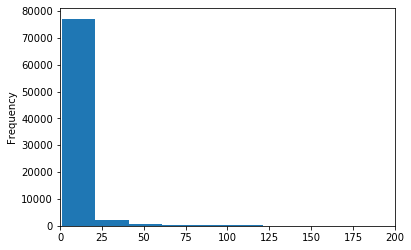

In [7]:
# plot the artwork counts histogram, on artist level
dataset['artist_full_name'].value_counts()[10:].plot.hist(bins=100, xlim=[0,200], xlabel="number of art works", ylabel="number of artists")

In [6]:
print(f"Unique geoid:  {dataset['school'].nunique()}")
print(dataset['school'].value_counts()[:100])

Unique geoid:  4428
unknown      662228
london       380279
modern       184170
paris         79474
new york      37413
              ...  
hamburg         972
v praze         972
haarlem         970
liverpool       926
exeter          883
Name: school, Length: 100, dtype: int64


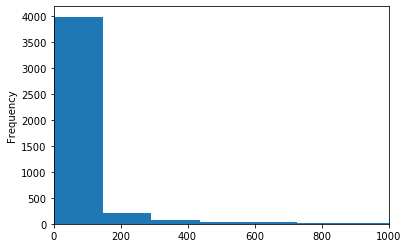

In [8]:
# plot the artwork counts histogram, on school level
dataset['school'].value_counts()[10:].plot.hist(bins=100, xlim=[0,1000], xlabel="number of art works", ylabel="number of school")

In [9]:
# Get the average number of works made by an artist
print(f"Average number of works per artist: {dataset['id'].count() / dataset['artist_full_name'].nunique():.2f}")

Average number of works per artist: 23.93


### Art type information

In [10]:
unique_types = dataset['general_type'].unique()
print(f"Unique types: {unique_types}")

Unique types: ['painting' 'sculpture' 'photograph' 'design' 'drawing' 'unknown' 'print'
 'craft' 'installation' 'new media' 'textile' 'weapons and armor'
 'mixed media' 'performance art' 'architecture']


### Art year distribution

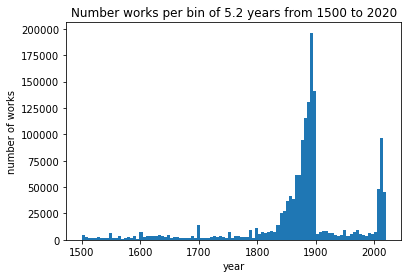

In [11]:
# Convert creation_year to numeric data
numeric_creation_year = pd.to_numeric(dataset['creation_year'], errors='coerce')
# remove NaN
numeric_creation_year.dropna(inplace=True)

# Note that I excluded works from before -2000 in this plot
start_year = 1500
end_year = 2020
bins=100
interval = (end_year - start_year) / bins

plt.hist(numeric_creation_year, range=(start_year, end_year), bins=bins)
plt.title(f"Number works per bin of {interval} years from {start_year} to {end_year}")
plt.xlabel('year')
plt.ylabel(f"number of works")
plt.show()